In [31]:
from sklearn.datasets import load_digits
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
digits = load_digits()
data = digits.data
target = digits.target

In [23]:
set(target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [12]:
print(data[5])

[ 0.  0. 12. 10.  0.  0.  0.  0.  0.  0. 14. 16. 16. 14.  0.  0.  0.  0.
 13. 16. 15. 10.  1.  0.  0.  0. 11. 16. 16.  7.  0.  0.  0.  0.  0.  4.
  7. 16.  7.  0.  0.  0.  0.  0.  4. 16.  9.  0.  0.  0.  5.  4. 12. 16.
  4.  0.  0.  0.  9. 16. 16. 10.  0.  0.]


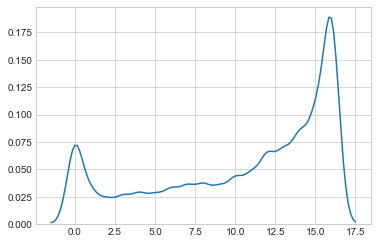

In [13]:
sns.set_style('whitegrid')
sns.kdeplot(data[:,10], bw = 0.5)
plt.show()

In [16]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)
clf = MultinomialNB()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
acc = accuracy_score(y_test, pred, normalize = True)*100
print(acc)

91.11111111111111


In [62]:
for i in range(len(set(target))):
    m = clf.feature_log_prob_[i].argsort()[-10:][::-1]
    print(type(m))
    print(m)
    m = clf.feature_log_prob_[i][m]
    print(m)

<class 'numpy.ndarray'>
[18 42 11 59 60 53 50  3 26 10]
[-3.10471916 -3.16243739 -3.16722336 -3.16722336 -3.16935783 -3.17525123
 -3.19917842 -3.20248603 -3.21414959 -3.24420572]
<class 'numpy.ndarray'>
[19 20 12 27 28 36 52 44 60 11]
[-3.05738477 -3.0951603  -3.11435475 -3.11483936 -3.11969846 -3.13293719
 -3.14036849 -3.15388559 -3.19085078 -3.21896189]
<class 'numpy.ndarray'>
[ 3 51 59 10 60 12 28 52 11 43]
[-3.09863875 -3.09863875 -3.11127475 -3.1251034  -3.1775102  -3.21178664
 -3.24669719 -3.25605946 -3.26254725 -3.27925408]
<class 'numpy.ndarray'>
[59 28  3  4 60 53 10 20 45 36]
[-3.04969338 -3.0600515  -3.07326654 -3.07464364 -3.09787889 -3.18168985
 -3.20026624 -3.22078787 -3.23578547 -3.23686539]
<class 'numpy.ndarray'>
[44 34 26 37 52 11 36 43 60  4]
[-3.06152824 -3.06152824 -3.0625048  -3.10593564 -3.14654507 -3.14920535
 -3.17292614 -3.22844923 -3.28968679 -3.30451102]
<class 'numpy.ndarray'>
[59 10 26 18  4  3 11  5 27 52]
[-3.0299132  -3.03899179 -3.0560076  -3.06485928 

In [36]:
clf.coef_

array([[-10.70412049,  -9.09468258,  -4.40333469,  -3.20248603,
         -3.34847939,  -4.72018421,  -9.31782613, -10.70412049,
        -10.70412049,  -5.85209022,  -3.24420572,  -3.16722336,
         -3.30901294,  -3.33515009,  -5.82131857, -10.70412049,
        -10.70412049,  -4.45029168,  -3.10471916,  -4.04996797,
         -4.90200211,  -3.25578663,  -4.52617637, -10.70412049,
        -10.70412049,  -4.0974703 ,  -3.21414959,  -5.01038835,
         -7.52606666,  -3.53554059,  -3.90953391, -10.70412049,
        -10.70412049,  -3.99481615,  -3.30166897,  -5.7136879 ,
         -8.50689591,  -3.58286804,  -3.79936972, -10.70412049,
        -10.70412049,  -4.53450976,  -3.16243739,  -5.11687183,
         -5.32422314,  -3.33011863,  -3.99116429, -10.70412049,
        -10.70412049,  -5.99459029,  -3.19917842,  -3.44149189,
         -3.42135931,  -3.17525123,  -4.85479571, -10.70412049,
        -10.70412049, -10.70412049,  -4.37261864,  -3.16722336,
         -3.16935783,  -4.0655527 ,  -7.

In [55]:
text = ['I am Navdeep.', ' I live in Patiala.', ' study in Thapar University']
vectorizer = CountVectorizer()
vectorizer.fit(text)
x = vectorizer.transform(['Hi I live in Patiala'])
print(x.toarray())

[[0 1 1 0 1 0 0 0]]


In [56]:
vectorizer.vocabulary_

{'am': 0,
 'navdeep': 3,
 'live': 2,
 'in': 1,
 'patiala': 4,
 'study': 5,
 'thapar': 6,
 'university': 7}

In [69]:
vectorizer.get_feature_names()

['am', 'in', 'live', 'navdeep', 'patiala', 'study', 'thapar', 'university']

In [52]:
print(vectorizer.get_stop_words())

None


In [53]:
vectorizer.stop_words_

set()

In [54]:
print(vectorizer)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [68]:
v = np.array([1,4])
lst = np.array([34,65,7,23,5,4,89])
print(lst)
l = lst[v]
print(l)

[34 65  7 23  5  4 89]
[65  5]
